# City Council District 07 Contributions

## Ivana Moore

### Import Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
import pandas as pd
import numpy as np
import re


### Read in all the Data

In [3]:
candidates_2021 = pd.read_csv('candidates.csv')
contributions_2021 = pd.read_csv('2021_Contributions.csv')
candidate_contribution_2021 = pd.merge(contributions_2021,candidates_2021, how='left', left_on = 'RECIPNAME', right_on = 'didate')
cd7_2021 = candidate_contribution_2021[candidate_contribution_2021['Office Sought']=='City Council District 07']
cd7_2017 = pd.read_csv('2017_Contributions.csv')
cd7_2013 = pd.read_csv('2013_Contributions.csv')



# How much money is in CD7 race?

Text(0, 0.5, 'Total Amount in Dollars')

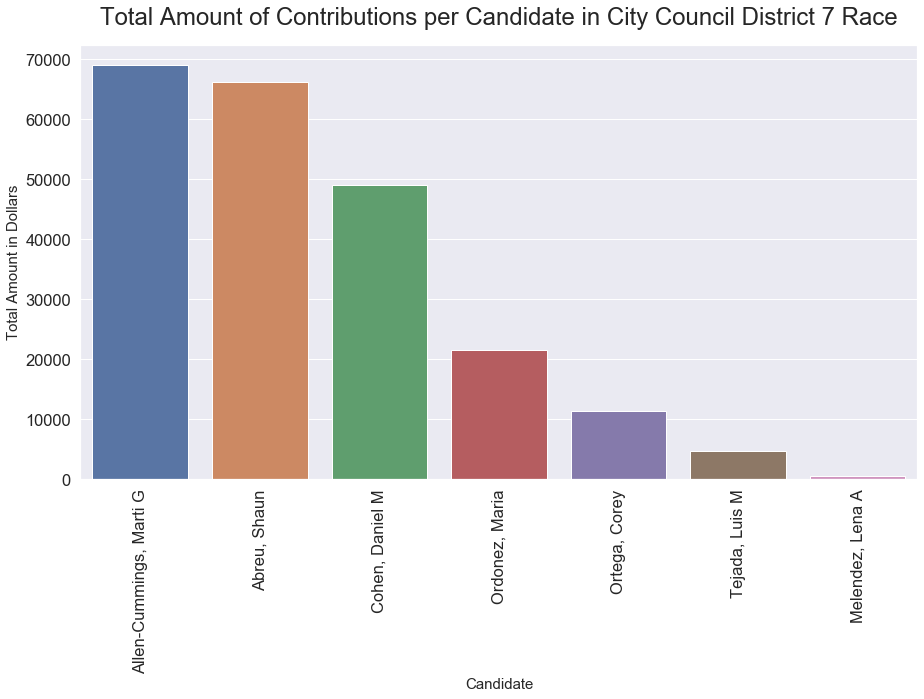

In [8]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.barplot('RECIPNAME', 'AMNT', data = cd7_2021.groupby(['RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False))
plt.xticks(rotation = 90)

plt.title('Total Amount of Contributions per Candidate in City Council District 7 Race', fontsize = 24, pad = 20)
plt.xlabel('Candidate', fontsize = 15)
plt.ylabel('Total Amount in Dollars', fontsize = 15)



# How does CD7 compare to other races (2021)?

Text(0, 0.5, 'Total Amount in Dollars')

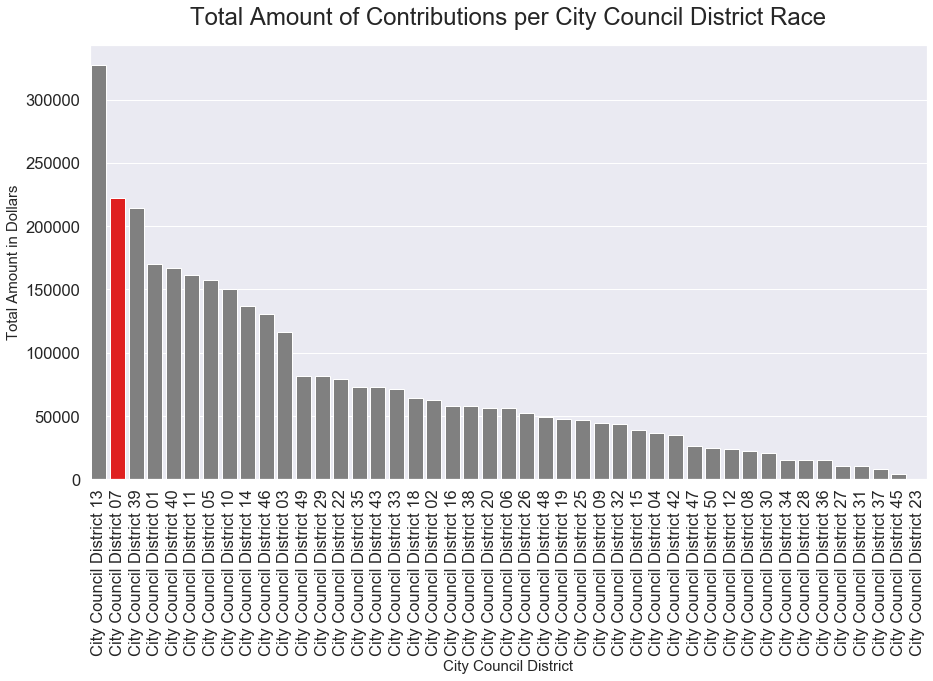

In [10]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

office_amount = candidate_contribution_2021.groupby('Office Sought', as_index=False)['AMNT'].sum()
council = office_amount[~office_amount['Office Sought'].isin(['Bronx Boro President', 'Brooklyn Boro President', 'Comptroller', 'Manhattan Boro President','Mayor','Public Advocate','Staten Island Boro President', 'Undeclared'])].sort_values('AMNT', ascending=False)

clrs = ['red' if (x == 222473.970) else 'grey' for x in council['AMNT'] ]

plt.figure(figsize=(15,8))
sns.barplot(council['Office Sought'], council['AMNT'], palette=clrs)
plt.xticks(rotation = 90)

plt.title('Total Amount of Contributions per City Council District Race', fontsize = 24, pad = 20)
plt.xlabel('City Council District', fontsize = 15)
plt.ylabel('Total Amount in Dollars', fontsize = 15)

# How many contributors do each candidate have?

Text(0, 0.5, 'Number of Contributors')

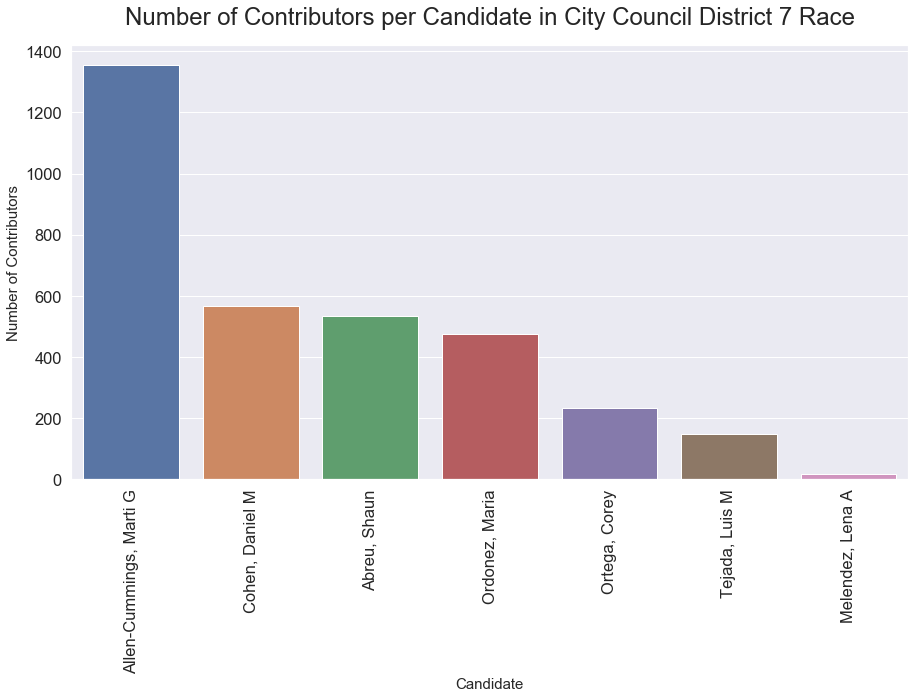

In [13]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.barplot('RECIPNAME', 'AMNT', data = cd7_2021.groupby(['RECIPNAME'], as_index=False)['AMNT'].count().sort_values('AMNT', ascending=False))
plt.xticks(rotation = 90)

plt.title('Number of Contributors per Candidate in City Council District 7 Race', fontsize = 24, pad = 20)
plt.xlabel('Candidate', fontsize = 15)
plt.ylabel('Number of Contributors', fontsize = 15)




# Who are the top 10 donors of CD 7 race?



In [14]:
cd7_2021.groupby(['NAME','OCCUPATION','EMPNAME','C_CODE','RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False).head(10)


,NAME,OCCUPATION,EMPNAME,C_CODE,RECIPNAME,AMNT
306,"Cohen, Daniel",Affordable housing nonprofit,Housing Partnership,IND,"Cohen, Daniel M",2550.000
1336,"Plesner, Rene",President,Rene Plessner Associates Inc.,IND,"Abreu, Shaun",2000.000
605,"Gelman, S. Asher",Director/Playwright,Self-Employed,IND,"Allen-Cummings, Marti G",1175.000
1250,"Ordonez, Luis A",Salesman,Bandi Fashion,FAM,"Ordonez, Maria",1175.000
728,"Hemmerdinger, Dale",executive,Atco Properties,IND,"Abreu, Shaun",1100.000
283,"Charles, Bolivar",Analyst,113 Capital LLC,IND,"Abreu, Shaun",1050.000
634,"Goldshine, Scott",General Manager,Zabars,IND,"Abreu, Shaun",1000.000
1126,"Miller, Ellen",Associate,Rene Plessner Associates,IND,"Abreu, Shaun",1000.000
766,"Hollander, Nancy",Assistant Commissioner,New York State Office of Menta,IND,"Abreu, Shaun",1000.000
902,"Lafond, Norman",Consulting Engineer,Self-Employed,IND,"Abreu, Shaun",1000.000


# Who are the top 10 Columbia-affiliated donors?

In [17]:

cd7_2021[(cd7_2021['EMPNAME'].str.contains('Columbia', flags=re.IGNORECASE)==True)].groupby(['NAME','OCCUPATION','EMPNAME','RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False).head(10)


,NAME,OCCUPATION,EMPNAME,RECIPNAME,AMNT
28,"Perlman, Elaine",Teacher,"Teachers College, Columbia Uni","Cohen, Daniel M",275.000
22,"Montas, Roosevelt",Professor,Columbia University,"Abreu, Shaun",175.000
4,"Camp, Matthew",Government Relations,"Teachers College, Columbia Uni","Cohen, Daniel M",125.000
15,"Hubbard, Philip",Teacher,Columbia Secondary School,"Ordonez, Maria",100.000
2,"Benitez, Victoria",Administrator,Columbia University,"Abreu, Shaun",100.000
27,"Patel, Kiri",College Counselor,Columbia Secondary School,"Ordonez, Maria",100.000
9,"Eden, Kathy",Professor,Columbia University,"Abreu, Shaun",100.000
10,"Falco, Michael",Associate Director,Columbia University,"Allen-Cummings, Marti G",100.000
11,"Gillooly, Eileen",Professor/Administrator,Columbia University,"Abreu, Shaun",100.000
16,"Lee, Jessica",Lecturer,Columbia University,"Abreu, Shaun",90.000


# Q4: What about real estate/housing employeers and employees?

In [29]:
emp_dev =cd7_2021[cd7_2021['EMPNAME'].str.contains('Dev', flags=re.IGNORECASE)==True].groupby(['NAME','OCCUPATION','EMPNAME','RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False)

emp_estate =cd7_2021[cd7_2021['EMPNAME'].str.contains('estate', flags=re.IGNORECASE)==True].groupby(['NAME','OCCUPATION','EMPNAME','RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False)

occup_estate = cd7_2021[(cd7_2021['OCCUPATION'].str.contains('estate', flags=re.IGNORECASE)==True)].groupby(['NAME','OCCUPATION','EMPNAME','RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False)

occup_housing = cd7_2021[(cd7_2021['OCCUPATION'].str.contains('housing', flags=re.IGNORECASE)==True)].groupby(['NAME','OCCUPATION','EMPNAME','RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False)

emp_housing =  cd7_2021[(cd7_2021['EMPNAME'].str.contains('housing', flags=re.IGNORECASE)==True)].groupby(['NAME','OCCUPATION','EMPNAME','RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False)

frames = [emp_dev, emp_estate, emp_housing, occup_estate, occup_housing]
real_estate_cd7 = pd.concat(frames).drop_duplicates()


In [31]:

print("The total from real estate in this race is: " +  str(real_estate_cd7['AMNT'].sum()))

print("The proportion of real estate constributions in this race is: "+ str(real_estate_cd7['AMNT'].sum() / cd7_2021['AMNT'].sum()))



The total from real estate in this race is: 10866.81
The proportion of real estate constributions in this race is: 0.04884530985804766


# How much does each candidate in CD7 have from real estate affiliates?

The total from real estate in this race is: 10866.81
The proportion of real estate constributions in this race is: 0.04884530985804766


Text(0, 0.5, 'Amount in Dollars')

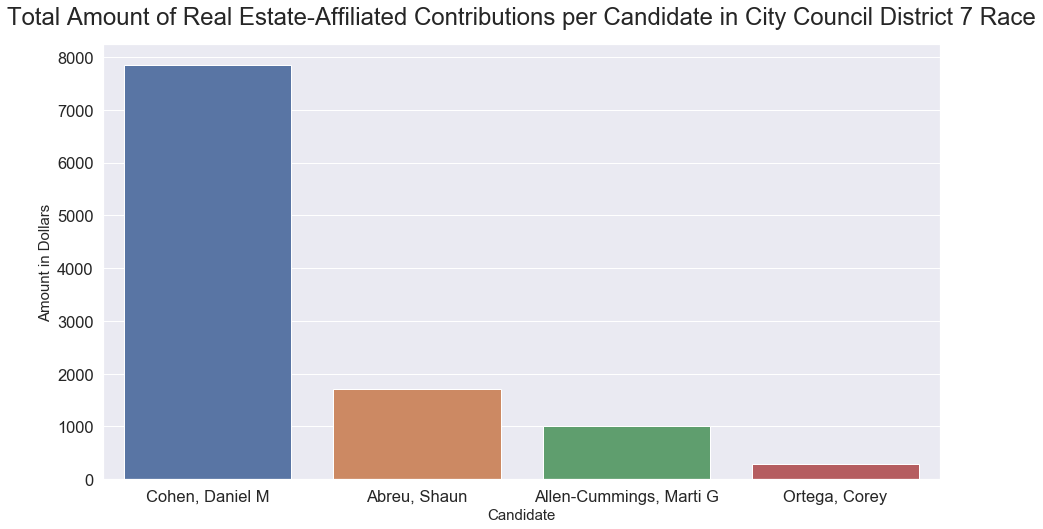

In [27]:

real_estate_candidates = real_estate_cd7.groupby(['RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False)

plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.barplot('RECIPNAME', 'AMNT', data = real_estate_candidates)

plt.title('Total Amount of Real Estate-Affiliated Contributions per Candidate in City Council District 7 Race', fontsize = 24, pad = 20)
plt.xlabel('Candidate', fontsize = 15)
plt.ylabel('Amount in Dollars', fontsize = 15)




# Who are the top 10 real estate-affiliated donors?

In [30]:
real_estate_cd7[real_estate_cd7['AMNT']>=200].sort_values('AMNT', ascending=False).head(10)

,NAME,OCCUPATION,EMPNAME,RECIPNAME,AMNT
1,"Cohen, Daniel",Affordable housing nonprofit,Housing Partnership,"Cohen, Daniel M",2550.000
14,"Hershey, Matthew",Real Estate Finance,Hodes Weill & Assoc.,"Cohen, Daniel M",500.000
2,"Cohen, Daniel",Vice President,Housing Partnership,"Cohen, Daniel M",432.810
15,"Higgins, Thomas",Real estate,LMC,"Abreu, Shaun",375.000
21,"Loya, Michael",Real Estate,JPMorgan Chase & Co.,"Abreu, Shaun",275.000
6,"Schulman, Ronald",Affordable Housing,Best Development Group LLC,"Cohen, Daniel M",250.000
24,"Marcovici, Elias",Real Estate,Blake Partners LLC,"Cohen, Daniel M",250.000
0,"Bell, Alan",Affordable Housing Developer,B&B Urban LLC,"Cohen, Daniel M",250.000
8,"Galloway, T Eric",Real Estate,Self-Employed,"Abreu, Shaun",250.000
30,"Powell, DeWayne A.",Real Estate Agent,Self-Employed,"Abreu, Shaun",250.000


In [135]:
cd7_2021.groupby(['RECIPNAME'], as_index=False)['AMNT'].sum()


,RECIPNAME,AMNT
0,"Abreu, Shaun",66144.00
1,"Allen-Cummings, Marti G",69013.00
2,"Cohen, Daniel M",49038.81
3,"Melendez, Lena A",652.00
4,"Ordonez, Maria",21497.16
5,"Ortega, Corey",11385.00
6,"Tejada, Luis M",4744.00


In [46]:
print(real_estate_candidates)
print(real_estate_candidates['AMNT']/ real_estate_candidates['AMNT'].sum() )


                 RECIPNAME     AMNT
2          Cohen, Daniel M 7846.810
0             Abreu, Shaun 1710.000
1  Allen-Cummings, Marti G 1015.000
3            Ortega, Corey  295.000
2   0.722
0   0.157
1   0.093
3   0.027
Name: AMNT, dtype: float64


# How does CD7 compare over time (2021 vs 2013)?

In [33]:
cd7_2013 = pd.read_csv('2013_Contributions.csv')
dicts = {'Years':['2013','2021'], 'Total Amount':[cd7_2013['AMNT'].sum(),cd7_2021['AMNT'].sum()] }
cd7_allyears = pd.DataFrame.from_dict(dicts)

In [44]:
print("Total sum in 2013: " + str(cd7_2013['AMNT'].sum()))

print ("\nEnding Amounts per Candidate in 2013: \n")
print(cd7_2013.groupby('RECIPNAME')['AMNT'].sum())

Total sum in 2013: 177689.48

Ending Amounts per Candidate in 2013: 

RECIPNAME
Gonzalez, Christina E     4505.000
Levine, Mark D          133427.480
Tejada, Luis M           39757.000
Name: AMNT, dtype: float64


Text(0, 0.5, 'Amount of Contributions in Dollars')

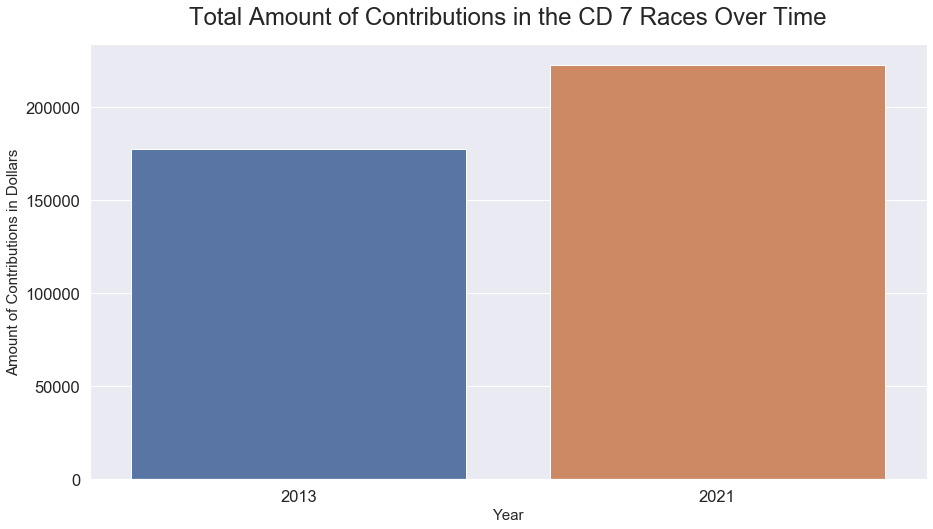

In [34]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.barplot(cd7_allyears['Years'], cd7_allyears['Total Amount'])

plt.xticks(rotation = 0)

plt.title('Total Amount of Contributions in the CD 7 Races Over Time', fontsize = 24, pad = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Amount of Contributions in Dollars', fontsize = 15)


In [47]:
emp_dev_2013 =cd7_2013[cd7_2013['EMPNAME'].str.contains('Dev', flags=re.IGNORECASE)==True].groupby(['NAME','OCCUPATION','EMPNAME','RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False)

emp_estate_2013 =cd7_2013[cd7_2013['EMPNAME'].str.contains('estate', flags=re.IGNORECASE)==True].groupby(['NAME','OCCUPATION','EMPNAME','RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False)

occup_estate_2013 = cd7_2013[(cd7_2013['OCCUPATION'].str.contains('estate', flags=re.IGNORECASE)==True)].groupby(['NAME','OCCUPATION','EMPNAME','RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False)

occup_housing_2013 = cd7_2013[(cd7_2013['OCCUPATION'].str.contains('housing', flags=re.IGNORECASE)==True)].groupby(['NAME','OCCUPATION','EMPNAME','RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False)

emp_housing_2013 =  cd7_2013[(cd7_2013['EMPNAME'].str.contains('housing', flags=re.IGNORECASE)==True)].groupby(['NAME','OCCUPATION','EMPNAME','RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False)

frames_2013 = [emp_dev_2013, emp_estate_2013, emp_housing_2013, occup_estate_2013, occup_housing_2013]
real_estate_cd7_2013 = pd.concat(frames_2013).drop_duplicates()



In [48]:

print("The total from real estate in the 2013 race was: " +  str(real_estate_cd7_2013['AMNT'].sum()))

print("The proportion of real estate constributions in the 2013 race was: "+ str(real_estate_cd7_2013['AMNT'].sum() / cd7_2013['AMNT'].sum()))



The total from real estate in the 2013 race was: 4680.0
The proportion of real estate constributions in the 2013 race was: 0.02633808146661243


Text(0, 0.5, 'Amount in Dollars')

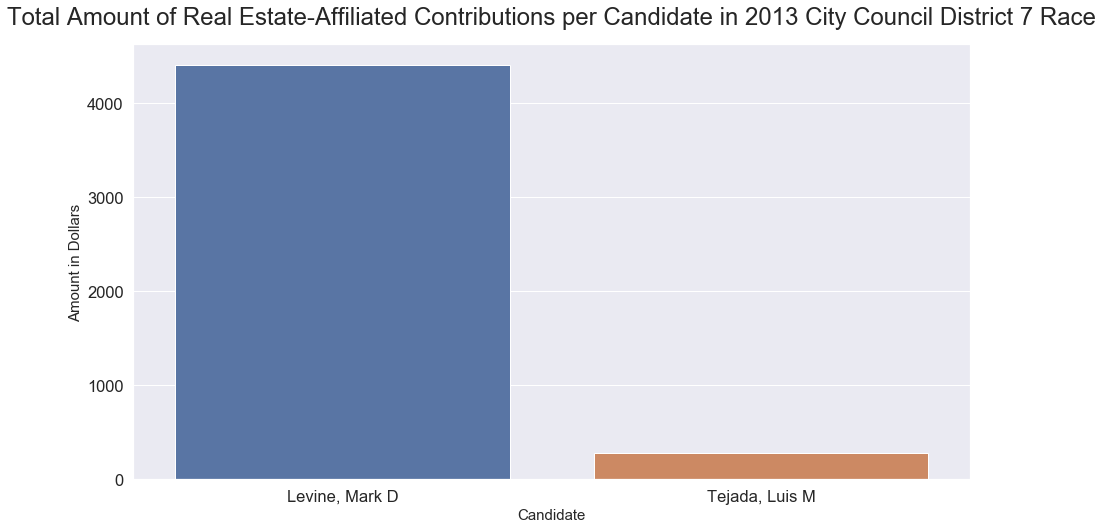

In [49]:

real_estate_candidates_2013 = real_estate_cd7_2013.groupby(['RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False)

plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.barplot('RECIPNAME', 'AMNT', data = real_estate_candidates_2013)

plt.title('Total Amount of Real Estate-Affiliated Contributions per Candidate in 2013 City Council District 7 Race', fontsize = 24, pad = 20)
plt.xlabel('Candidate', fontsize = 15)
plt.ylabel('Amount in Dollars', fontsize = 15)

